In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#1a) 
iris = pd.read_csv('iris.csv')
iris = iris.drop(columns='rownames')
iris.columns[0:4]

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], dtype='object')

In [3]:
scaler = StandardScaler()
iris_df = scaler.fit_transform(iris.drop(columns='Species'))
iris_df = pd.DataFrame(iris_df,columns=iris.columns[0:4])
iris_df['Species'] = iris['Species']
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica
146,0.553333,-1.282963,0.705921,0.922303,virginica
147,0.795669,-0.131979,0.819596,1.053935,virginica
148,0.432165,0.788808,0.933271,1.448832,virginica


In [4]:
#1b) 
#let's use sklearn dec_tr model 
from sklearn.tree import DecisionTreeClassifier as dec_tr
from sklearn import tree
from sklearn.model_selection import cross_val_score, LeaveOneOut, RepeatedKFold
from sklearn.metrics import f1_score, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Species'),\
                                                   iris['Species'],test_size=0.3,random_state=88)

In [5]:
model = dec_tr(criterion='entropy',random_state=42)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
y_train_hat = model.predict(X_train)
f1_iris = f1_score(y_test, y_hat,average='weighted')

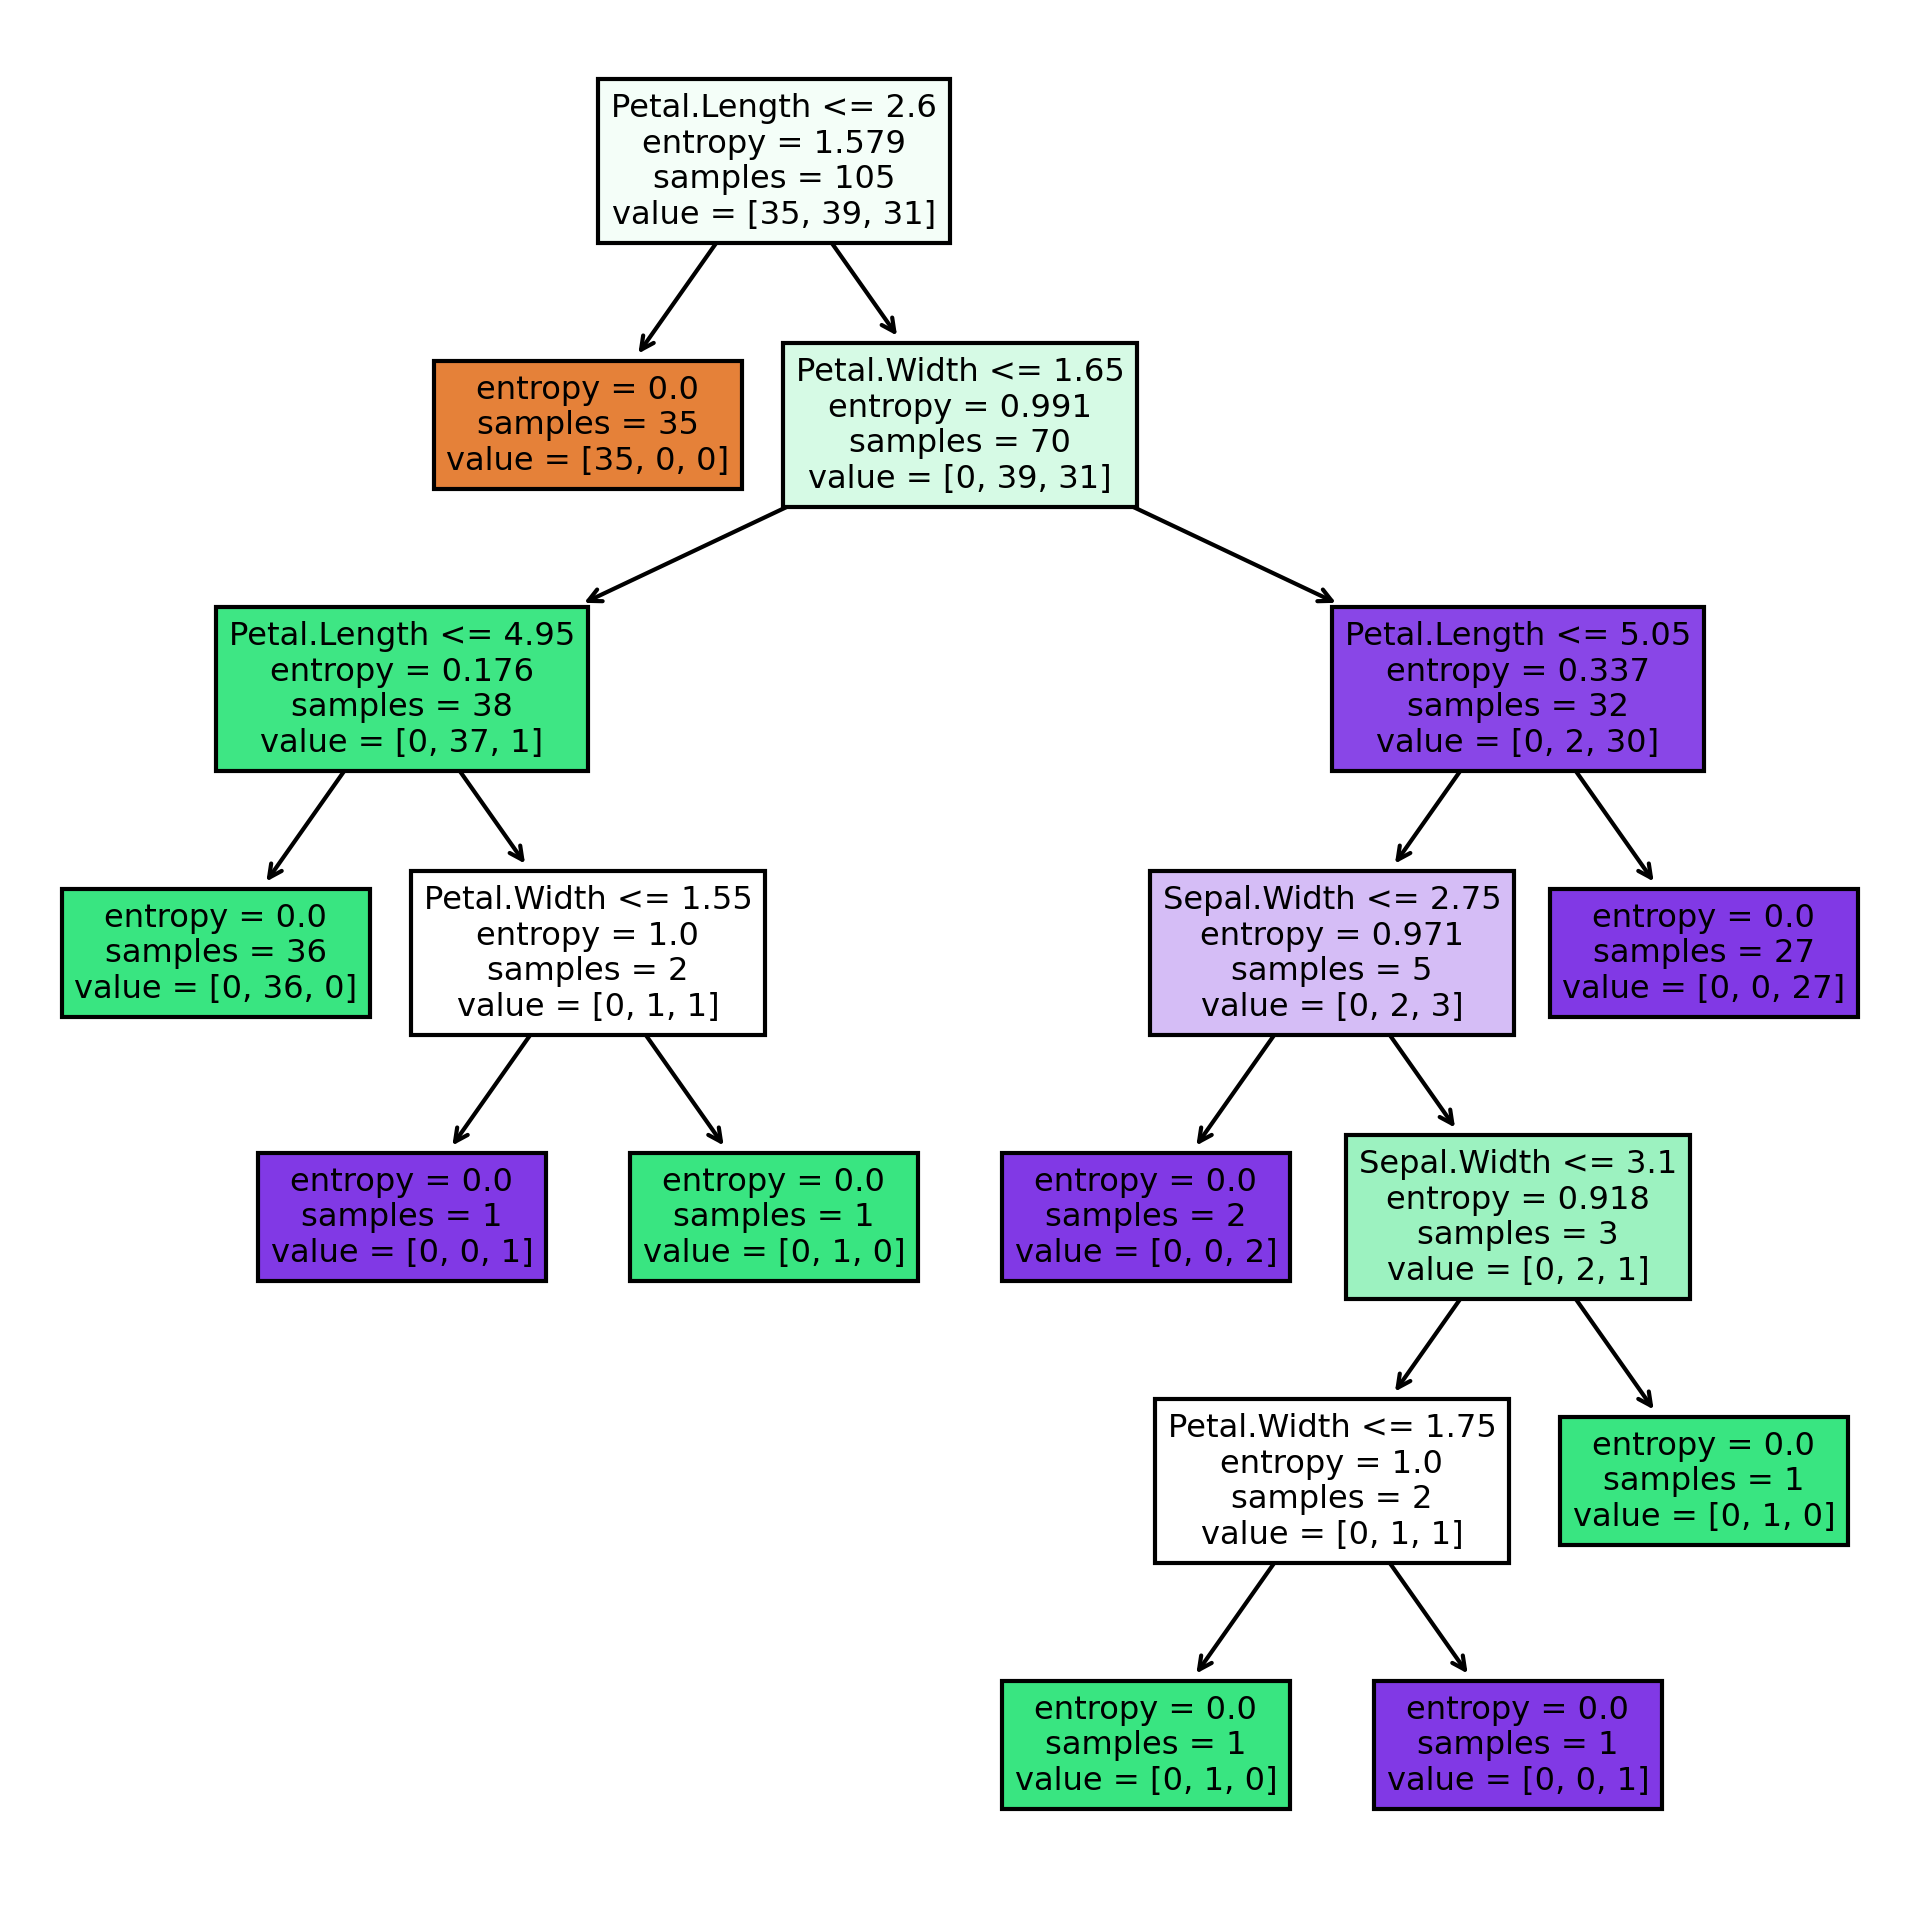

In [6]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
predictors = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
tree.plot_tree(model,
               feature_names = predictors, 
               filled = True,
               max_depth=model.tree_.max_depth);

Text(0.5, 1.0, 'Feature Importance')

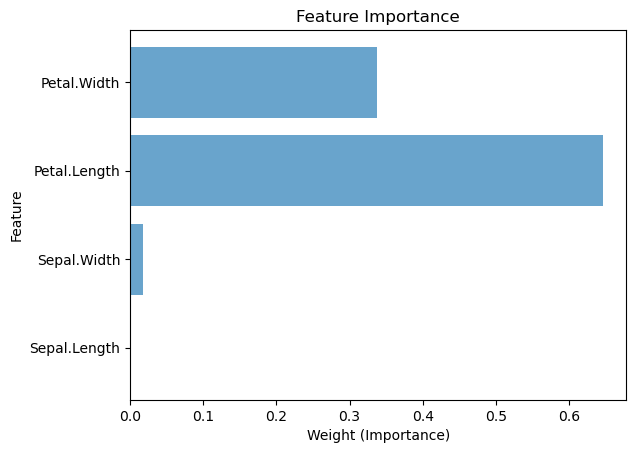

In [7]:
#1c) 
plt.barh(predictors, model.feature_importances_, alpha=0.67)
plt.xlabel('Weight (Importance)')
plt.ylabel('Feature')
plt.title('Feature Importance')

Petal length is the most important feature. 

F1 Score: 0.977960569264917


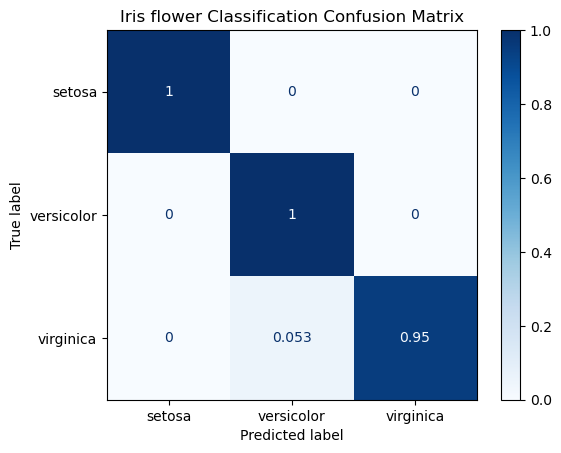

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_hat,
        cmap=plt.cm.Blues,
        normalize='true')
disp.ax_.set_title('Iris flower Classification Confusion Matrix')
print('F1 Score:',f1_iris)

It seems the model only makes one type of error, where it categorizes a virginica as a versicolor. 

In [9]:
print('Depth of the decision tree = %d'%(model.tree_.max_depth))
print('The no. of leaves in the decision tree = %d'%(model.get_n_leaves()) )
print('F1 score for the *training* dataset = %.3f'%f1_score(y_train, y_train_hat,average='weighted'))
print('F1 score for the *testing* dataset = %.3f'%f1_score(y_test, y_hat,average='weighted'))

######################
# Compute ccp_alphas #
######################

path = model.cost_complexity_pruning_path(X_train,y_train)
alphas = path['ccp_alphas']
alphas

Depth of the decision tree = 6
The no. of leaves in the decision tree = 9
F1 score for the *training* dataset = 1.000
F1 score for the *testing* dataset = 0.978


array([0.        , 0.01311851, 0.01904762, 0.01999872, 0.0444902 ,
       0.05655742, 0.49404082, 0.91829583])

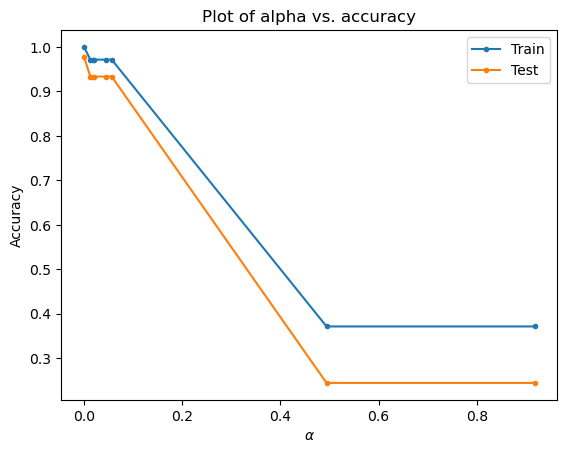

In [10]:
accuracy_train, accuracy_test = [], []

for a in alphas: 
    model_alpha = dec_tr(ccp_alpha=a,random_state=42)
    model_alpha.fit(X_train, y_train)
    y_train_hat = model_alpha.predict(X_train)
    y_hat = model_alpha.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train, y_train_hat)) 
    accuracy_test.append(accuracy_score(y_test, y_hat))
    
    
plt.plot(alphas, accuracy_train, color='C0', marker='.')
plt.plot(alphas, accuracy_test, color='C1', marker='.')
plt.xlabel(r'$\alpha$')
plt.ylabel('Accuracy')
plt.title('Plot of alpha vs. accuracy')
plt.legend(['Train', 'Test']);

In [11]:
for i in np.arange(0,0.1,0.001):
    model = dec_tr(criterion='entropy',random_state=42, ccp_alpha=i)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    f1 = f1_score(y_test, y_hat,average='weighted')
    print(f1,i)

0.977960569264917 0.0
0.977960569264917 0.001
0.977960569264917 0.002
0.977960569264917 0.003
0.977960569264917 0.004
0.977960569264917 0.005
0.977960569264917 0.006
0.977960569264917 0.007
0.977960569264917 0.008
0.977960569264917 0.009000000000000001
0.977960569264917 0.01
0.977960569264917 0.011
0.977960569264917 0.012
0.977960569264917 0.013000000000000001
0.9127199597787833 0.014
0.9127199597787833 0.015
0.9127199597787833 0.016
0.9127199597787833 0.017
0.9127199597787833 0.018000000000000002
0.9127199597787833 0.019
0.9344761904761906 0.02
0.9344761904761906 0.021
0.9344761904761906 0.022
0.9344761904761906 0.023
0.9344761904761906 0.024
0.9344761904761906 0.025
0.9344761904761906 0.026000000000000002
0.9344761904761906 0.027
0.9344761904761906 0.028
0.9344761904761906 0.029
0.9344761904761906 0.03
0.9344761904761906 0.031
0.9344761904761906 0.032
0.9344761904761906 0.033
0.9344761904761906 0.034
0.9344761904761906 0.035
0.9344761904761906 0.036000000000000004
0.9344761904761906 

It seems the best value for alpha is 0 or anything below 0.01 with an accuracy of 0.978. 

In [12]:
#d)
#From HW2. Retraining: 
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
f1_naive = f1_score(y_test, y_hat,average='weighted')
print('F1 Accuracy for Naive Bayes:',f1_naive)
#same accuracy I achieved last time 

F1 Accuracy for Naive Bayes: 0.9561728395061727


In [13]:
model = dec_tr(criterion='entropy',random_state=42,max_depth=6)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
f1_dec_tr = f1_score(y_test, y_hat,average='weighted')
print('F1 Accuracy for Naive Bayes:',f1_dec_tr)
diff = f1_dec_tr-f1_naive
print('Difference between models:',diff)

F1 Accuracy for Naive Bayes: 0.977960569264917
Difference between models: 0.021787729758744323


The decision tree model had a higher accuracy by 2.18 percent. This slight difference may be due to the fact that the decision tree is a more complex model that can adjust the weights of features and capture feature interactions better than Naive Bayes can. 

In [14]:
#2a)
ff = pd.read_csv('forestfires.csv')
ff = pd.get_dummies(ff, columns=['month', 'day']).astype(int)
ff['area'] = np.sqrt(ff['area'])
ff_standard = scaler.fit_transform(ff[['X', 'Y', 'FFMC','DMC','DC', 'ISI',\
                                       'temp', 'RH', 'wind', 'rain']])


ff_standard = pd.DataFrame(ff_standard, columns=['X', 'Y', 'FFMC','DMC','DC', 'ISI',\
                                       'temp', 'RH', 'wind', 'rain'])
ff_standardized = pd.concat([ff_standard,ff[['area', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed']]],axis=1)
ff_standardized.head(10)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,1.008313,0.569860,-0.762618,-1.319243,-1.829638,-0.789158,-1.798765,0.411724,1.360243,-0.057169,...,0,0,0,1,0,0,0,0,0,0
1,1.008313,-0.244001,-0.038183,-1.178711,0.490145,-0.570159,-0.072138,-0.692456,-1.980591,-0.057169,...,0,1,0,0,0,0,0,0,1,0
2,1.008313,-0.244001,-0.038183,-1.053794,0.558730,-0.570159,-0.762789,-0.692456,-1.423786,-0.057169,...,0,1,0,0,0,1,0,0,0,0
3,1.440925,1.383722,0.142925,-1.209941,-1.898223,0.086837,-1.798765,3.233519,0.246632,-0.057169,...,0,0,0,1,0,0,0,0,0,0
4,1.440925,1.383722,-0.219292,-0.928876,-1.797363,0.086837,-1.280777,3.356206,-1.423786,-0.057169,...,0,0,0,0,0,0,1,0,0,0
5,1.440925,1.383722,0.324034,-0.397978,-0.240082,1.181831,0.618513,-0.937830,0.803437,-0.057169,...,0,0,0,0,0,0,1,0,0,0
6,1.440925,1.383722,0.324034,-0.351134,-0.211841,-0.132162,0.963839,-1.060516,-0.310174,-0.057169,...,0,0,0,0,1,0,0,0,0,0
7,1.440925,1.383722,0.142925,0.538902,0.244046,0.305836,-1.798765,2.558742,-0.866980,-0.057169,...,0,0,0,0,1,0,0,0,0,0
8,1.440925,1.383722,0.142925,0.289068,0.582936,-0.351160,-0.935452,1.147845,0.803437,-0.057169,...,0,0,1,0,0,0,0,0,1,0
9,1.008313,0.569860,0.324034,-0.351134,0.607143,-0.351160,0.618513,-0.263053,0.246632,-0.057169,...,0,0,1,0,0,1,0,0,0,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(ff_standardized.drop(columns='area'),\
                                                   ff_standardized['area'],test_size=0.3,random_state=88)

In [16]:
#b) 
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.metrics import mean_squared_error, mean_absolute_error
model_mse = dtr(criterion='squared_error',random_state=42)
model_mse.fit(X_train, y_train)
y_hat = model_mse.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.48584563423908


In [17]:
model_mae = dtr(criterion='absolute_error',random_state=42)
model_mae.fit(X_train, y_train)
y_hat = model_mae.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print("Mean Squared Error:", mse)

Mean Squared Error: 16.09469252369865


In [18]:
model_mse.fit(X_train, y_train)
y_hat = model_mse.predict(X_test)
mae = mean_absolute_error(y_test, y_hat)
print("Mean Abs Error:", mae)

Mean Abs Error: 2.807605005929784


In [28]:
model_mae.fit(X_train, y_train)
y_hat = model_mae.predict(X_test)
mae = mean_absolute_error(y_test, y_hat)
print("Mean Abs Error:", mae)

Mean Abs Error: 2.6087252004968784


It seems that regardless of whether we are using MSE or MAE to measure the success of the model, using the criterion for MAE leads to better results. Thus we will be using the MAE. This makes sense as there are a couple outliers in the data that do not influence predictions as much for MAE. 

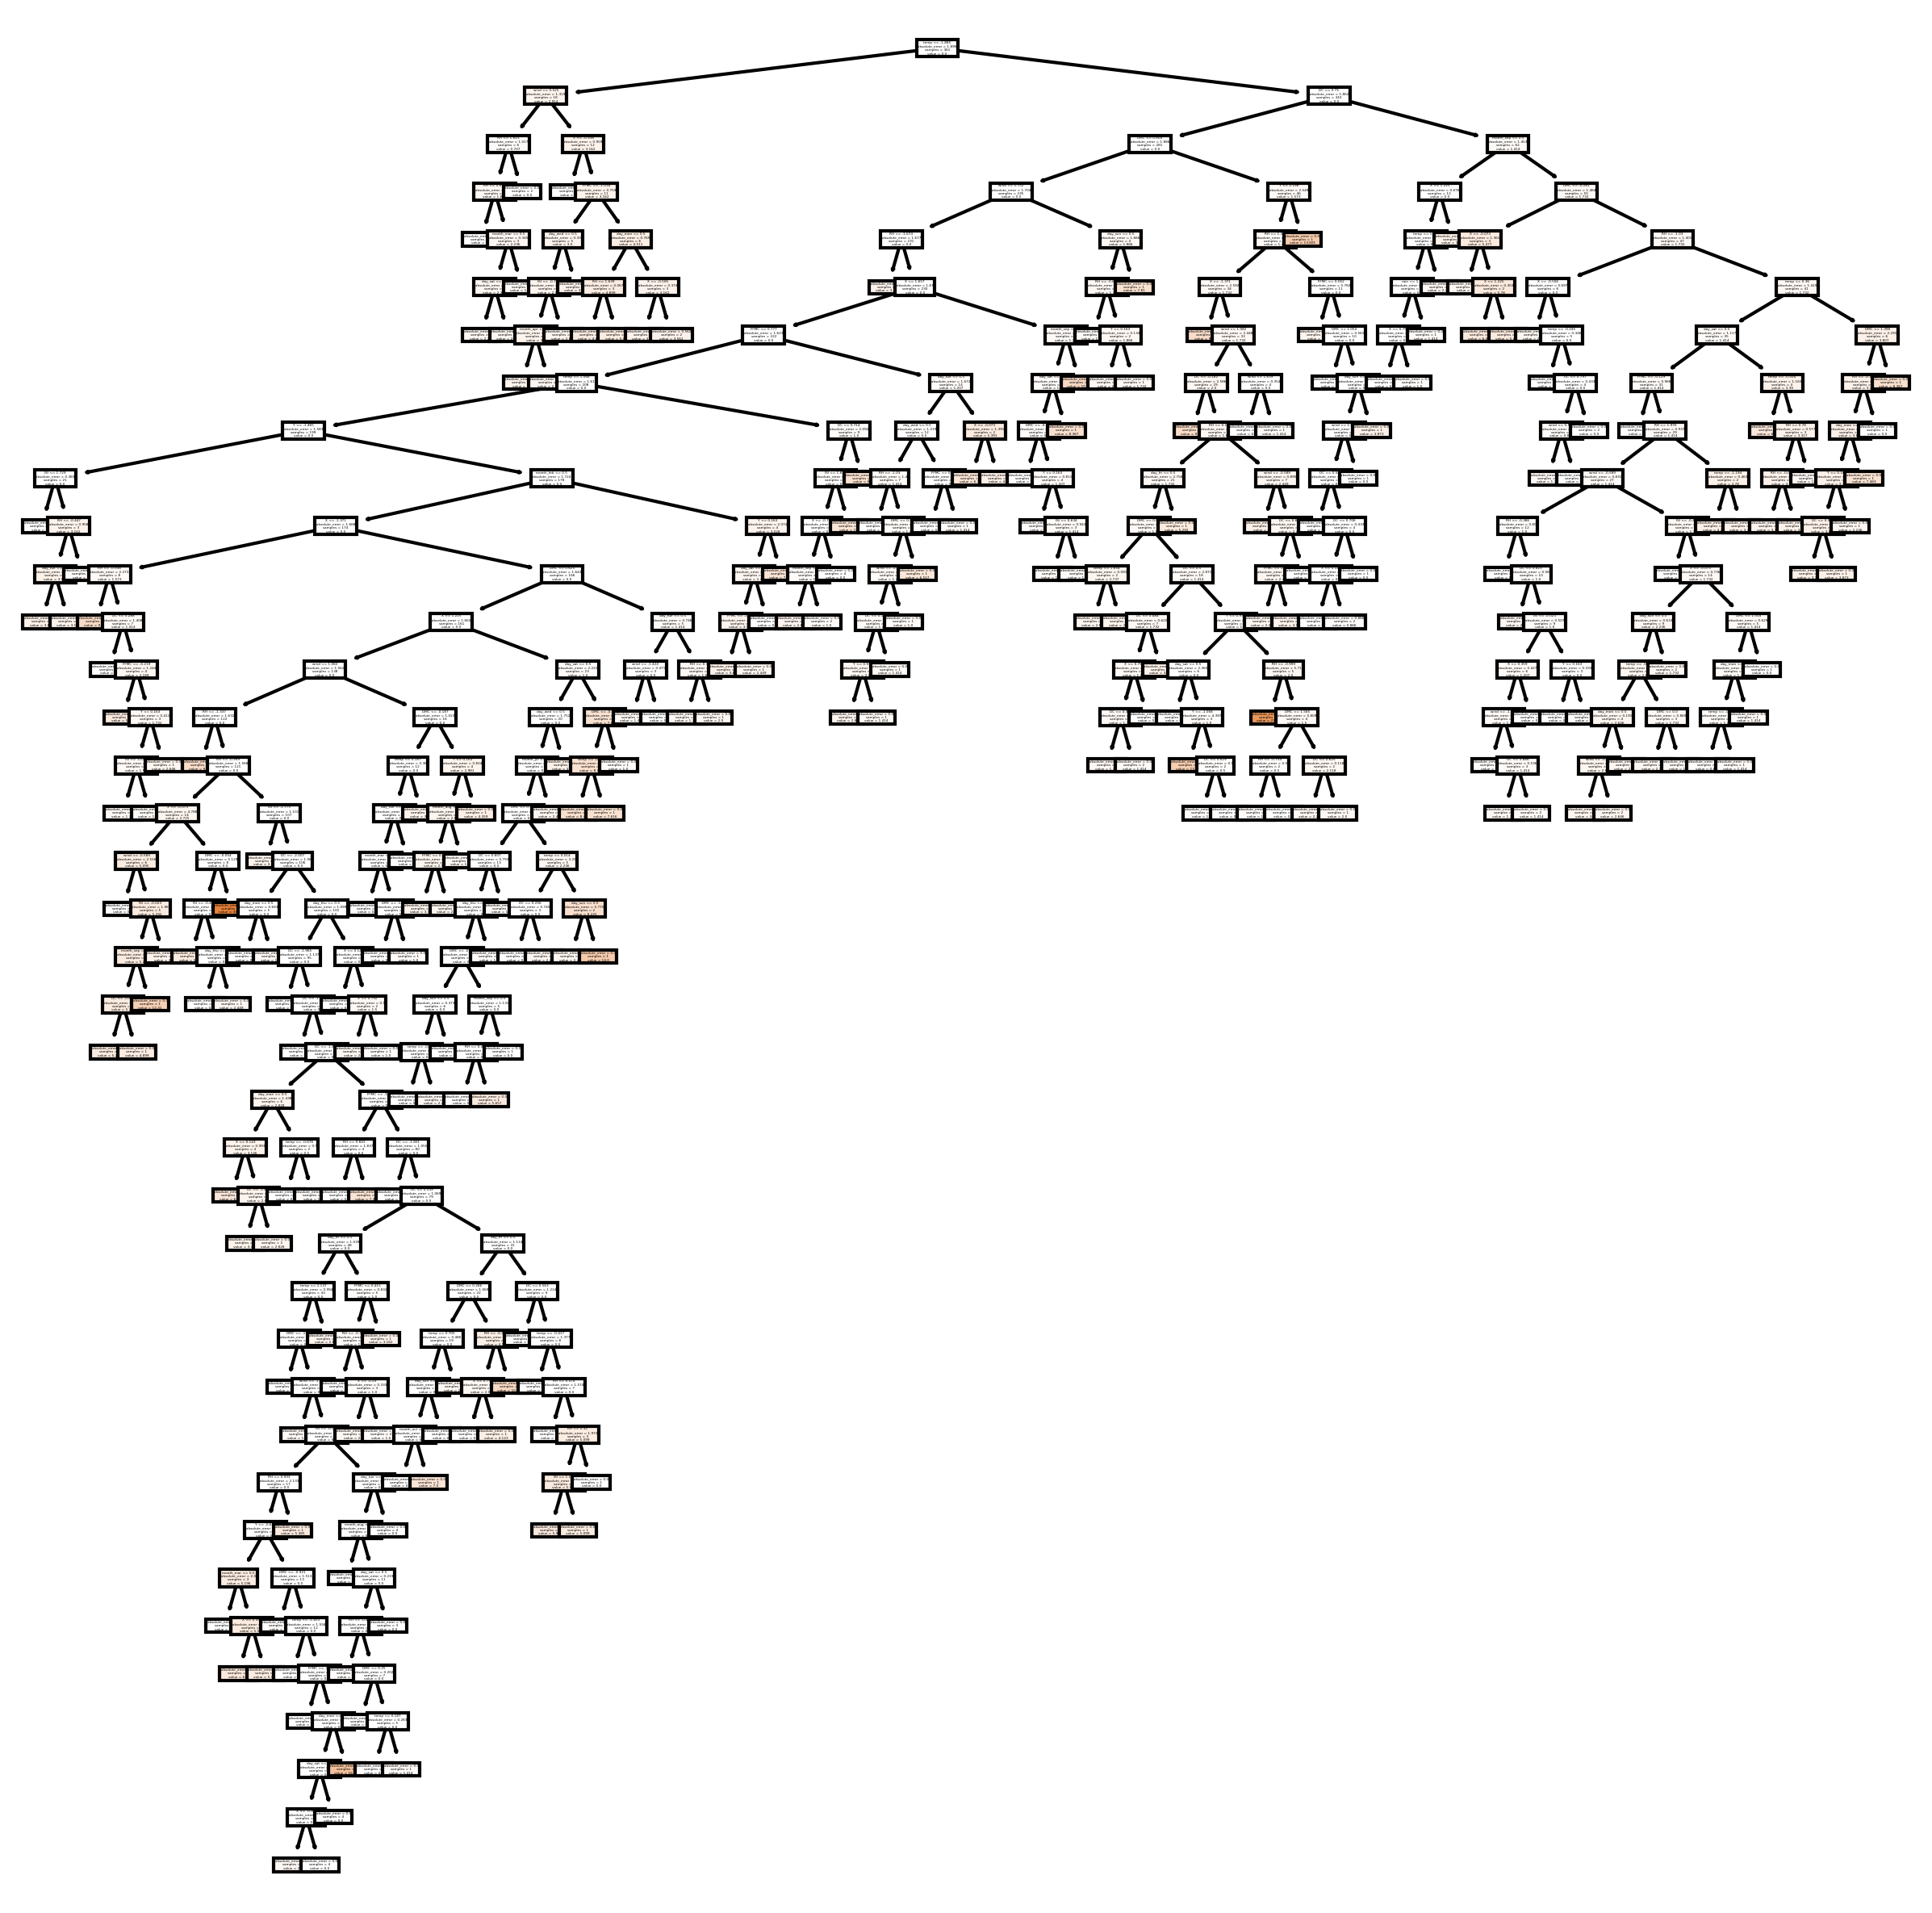

In [19]:
#c) 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
predictors = ['X', 'Y', 'FFMC','DMC','DC', 'ISI','temp', 'RH', 'wind', 'rain',\
              'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',\
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',\
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',\
       'day_thu', 'day_tue', 'day_wed']        
tree.plot_tree(model_mae,
               feature_names = predictors, 
               filled = True,
               max_depth=model_mae.tree_.max_depth);

Text(0.5, 1.0, 'Feature Importance')

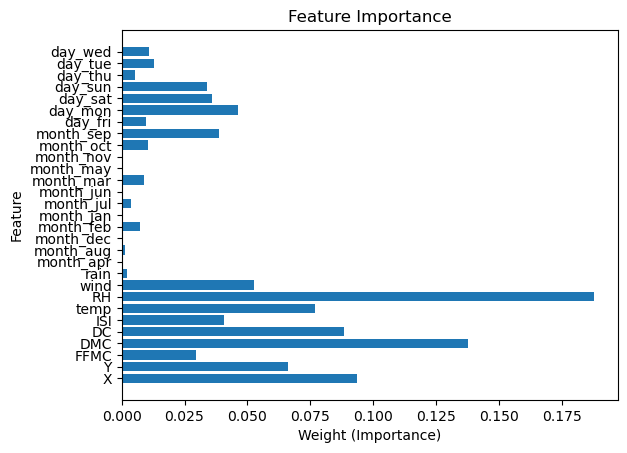

In [20]:
plt.barh(predictors, model_mae.feature_importances_)
plt.xlabel('Weight (Importance)')
plt.ylabel('Feature')
plt.title('Feature Importance')

Three most important features are RH (relative humidity), DMC, and X-coord values. 

1.287737202433545


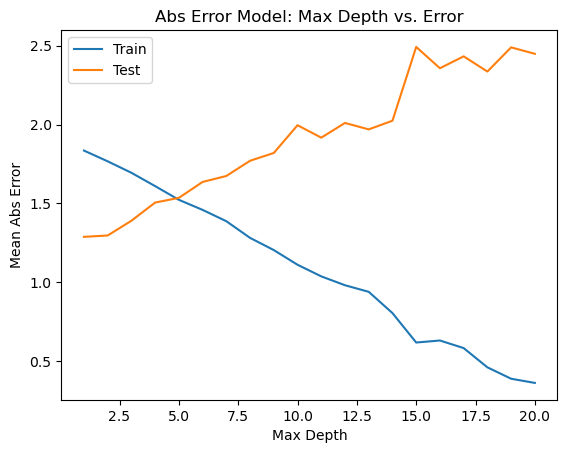

In [21]:
#using mae as metric as discussed earlier
mae_test = np.array([])
mae_train = np.array([])
for i in np.arange(1,21):
    model = dtr(criterion='absolute_error',random_state=42,max_depth=i)
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat = model.predict(X_test)
    mae_1 = mean_absolute_error(y_test, y_hat)
    mae_2 = mean_absolute_error(y_train, y_hat_train)
    mae_test = np.append(mae_test,mae_1)
    mae_train = np.append(mae_train,mae_2)
plt.plot(np.arange(1,21),mae_train,label='Train')
plt.plot(np.arange(1,21),mae_test,label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Mean Abs Error')
plt.title('Abs Error Model: Max Depth vs. Error')
plt.legend()
print(mae_test.min())

1.7598620484711536


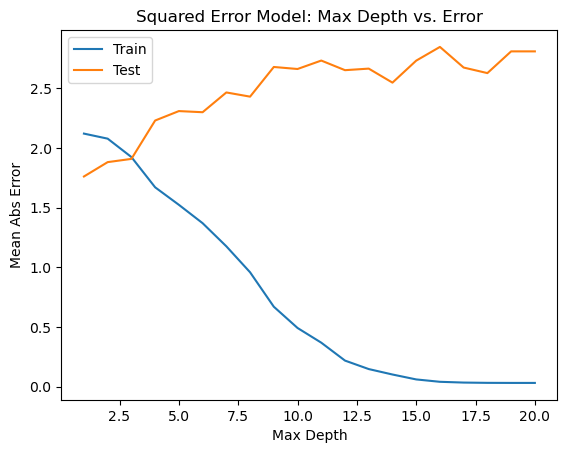

In [22]:
mae_test = np.array([])
mae_train = np.array([])
for i in np.arange(1,21):
    model = dtr(criterion='squared_error',random_state=42,max_depth=i)
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat = model.predict(X_test)
    mae_1 = mean_absolute_error(y_test, y_hat)
    mae_2 = mean_absolute_error(y_train, y_hat_train)
    mae_test = np.append(mae_test,mae_1)
    mae_train = np.append(mae_train,mae_2)
plt.plot(np.arange(1,21),mae_train,label='Train')
plt.plot(np.arange(1,21),mae_test,label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Mean Abs Error')
plt.title('Squared Error Model: Max Depth vs. Error')
plt.legend()
print(mae_test.min())

1.7598620484711536


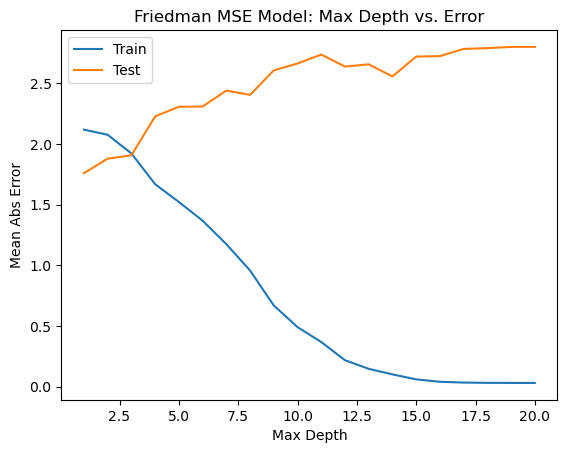

In [23]:
mae_test = np.array([])
mae_train = np.array([])
for i in np.arange(1,21):
    model = dtr(criterion='friedman_mse',random_state=42,max_depth=i)
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat = model.predict(X_test)
    mae_1 = mean_absolute_error(y_test, y_hat)
    mae_2 = mean_absolute_error(y_train, y_hat_train)
    mae_test = np.append(mae_test,mae_1)
    mae_train = np.append(mae_train,mae_2)
plt.plot(np.arange(1,21),mae_train,label='Train')
plt.plot(np.arange(1,21),mae_test,label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Mean Abs Error')
plt.title('Friedman MSE Model: Max Depth vs. Error')
plt.legend()
print(mae_test.min())

1.7598620484711536


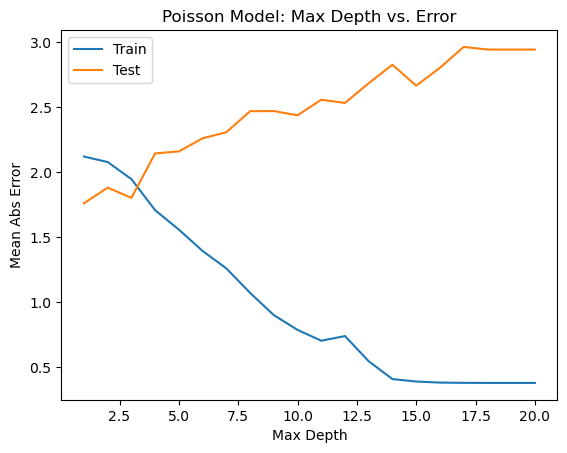

In [24]:
mae_test = np.array([])
mae_train = np.array([])
for i in np.arange(1,21):
    model = dtr(criterion='poisson',random_state=42,max_depth=i)
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat = model.predict(X_test)
    mae_1 = mean_absolute_error(y_test, y_hat)
    mae_2 = mean_absolute_error(y_train, y_hat_train)
    mae_test = np.append(mae_test,mae_1)
    mae_train = np.append(mae_train,mae_2)
plt.plot(np.arange(1,21),mae_train,label='Train')
plt.plot(np.arange(1,21),mae_test,label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Mean Abs Error')
plt.title('Poisson Model: Max Depth vs. Error')
plt.legend()
print(mae_test.min())

The test and training data sets have the opposite relationship with respect to max depth, with the test set error increasing with depth and the training set error decreasing with depth. Since in HW3 we found that none of the features are really significant, it makes sense why only one branch would result in the lowest error. 

In [25]:
from sklearn.linear_model import LinearRegression as lr
model = lr(fit_intercept=True)
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
mean_absolute_error(y_test, y_hat) 

1.8655870075490186

[Text(0.5, 0.8333333333333334, 'temp <= -1.885\nabsolute_error = 1.895\nsamples = 361\nvalue = 0.0'),
 Text(0.25, 0.5, 'wind <= 0.525\nabsolute_error = 1.319\nsamples = 18\nvalue = 2.914'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'DC <= 0.75\nabsolute_error = 1.862\nsamples = 343\nvalue = 0.0'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

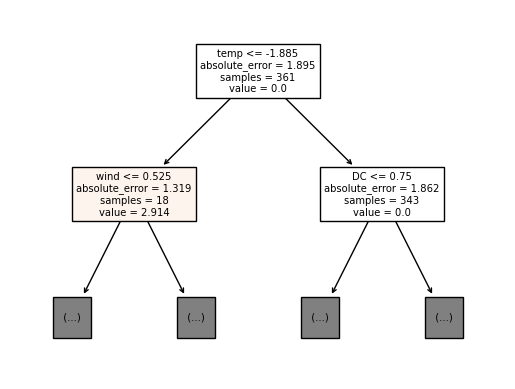

In [26]:
tree.plot_tree(model_mae,
               feature_names = predictors, 
               filled = True,
               max_depth=1)
#it seems that the tree plot used these three features 

In [27]:
model = lr(fit_intercept=True)
X_train_3 = X_train[['temp','wind','DC']]
X_test_3 = X_test[['temp','wind','DC']]
model.fit(X_train_3,y_train)
y_hat = model.predict(X_test_3)
mean_absolute_error(y_test, y_hat)
#still higher than tree.. 

1.7528873244684386

The decision tree with max_depth = 1 and criterion = 'absolute_error' has an error of 1.28, which is lower than that of linear regression. 